In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.interpolate import spline
from matplotlib.ticker import LinearLocator, FormatStrFormatter

path = 'exp_results/'
RWD = 'rewards.npy'
CMP = 'comp_ps.npy'
NS_LIST = [100, 200, 400, 800, 1000, 1500, 2000, 3000, 5000, 8000]

In [21]:
def smooth_rwd(rwd,ratio=10):
    new_rwd = np.zeros(rwd.shape)
    tmp = rwd[0]
    for i in range(rwd.size):
        tmp = (1-1/ratio)*tmp + 1/ratio*rwd[i]
        new_rwd[i] = tmp
    return new_rwd

C5.2 Bottleneck Effect -- phA
----------

In [22]:
Path_phA1200 = 'Reset_both_11/'
Path_phA1000 = 'Reset_both_01/'
Path_phA800  = 'Reset_both_12/'
Path_phA600  = 'Reset_both_13/'
Path_phA400  = 'Reset_both_14/'
Path_phA200  = 'Reset_both_15/'
Path_phA100  = 'Reset_both_16/'
Path_phA50   = 'Reset_both_17/'
Path_phA1500 = 'Reset_both_18/'
Path_phA2000 = 'Reset_both_19/'
Path_phA3000 = 'Reset_both_21/'
Path_phA5000 = 'Reset_both_20/'
Path_phA8000 = 'Reset_both_22/'
#Path_phA5000 = 'test_both_spk_and_lis_long/'

Path_phB8000 = 'Reset_both_25/'
Path_phB4000 = 'Reset_both_10/'
Path_phB3000 = 'Reset_both_09/'
Path_phB2000 = 'Reset_both_01/'
Path_phB1500 = 'Reset_both_24/'
Path_phB1000 = 'Reset_both_05/'
Path_phB800  = 'Reset_both_06/'
Path_phB600  = 'Reset_both_07/'
Path_phB400  = 'Reset_both_08/'
Path_phB200  = 'Reset_both_23/'


SMOOTH_RATIO = 5

In [23]:
def cmp_avg_std(CMP_phA):
    
    matrix_cmp = CMP_phA.reshape((100,-1))
    averag_cmp = smooth_rwd(np.average(matrix_cmp,axis=1),SMOOTH_RATIO)
    standa_cmp = smooth_rwd(matrix_cmp.std(1), 2*SMOOTH_RATIO)
    return averag_cmp, standa_cmp

In [24]:
CMP_phA8000 = cmp_avg_std(np.load(path+Path_phA8000+CMP))
CMP_phA5000 = cmp_avg_std(np.load(path+Path_phA5000+CMP))
CMP_phA3000 = cmp_avg_std(np.load(path+Path_phA3000+CMP))
CMP_phA2000 = cmp_avg_std(np.load(path+Path_phA2000+CMP))
CMP_phA1500 = cmp_avg_std(np.load(path+Path_phA1500+CMP))
CMP_phA1000 = cmp_avg_std(np.load(path+Path_phA1000+CMP))
CMP_phA1200 = cmp_avg_std(np.load(path+Path_phA1200+CMP))
CMP_phA800  = cmp_avg_std(np.load(path+Path_phA800+CMP))
#CMP_phA600  = cmp_avg_std(np.load(path+Path_phA600+CMP))
CMP_phA400  = cmp_avg_std(np.load(path+Path_phA400+CMP))
CMP_phA200  = cmp_avg_std(np.load(path+Path_phA200+CMP))
CMP_phA100  = cmp_avg_std(np.load(path+Path_phA100+CMP))
#CMP_phA50   = cmp_avg_std(np.load(path+Path_phA50+CMP))

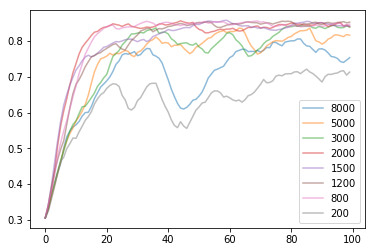

In [25]:
plt.plot(CMP_phA8000[0],label='8000',alpha=0.5)
plt.plot(CMP_phA5000[0],label='5000',alpha=0.5)
plt.plot(CMP_phA3000[0],label='3000',alpha=0.5)
plt.plot(CMP_phA2000[0],label='2000',alpha=0.5)
plt.plot(CMP_phA1500[0],label='1500',alpha=0.5)
plt.plot(CMP_phA1200[0],label='1200',alpha=0.5)
plt.plot(CMP_phA800[0],label='800',alpha=0.5)
#plt.plot(CMP_phA600[0],label='600',alpha=0.5)
plt.plot(CMP_phA200[0],label='200',alpha=0.5)
#plt.plot(CMP_phA50[0],label='50',alpha=0.5)
plt.legend()
plt.show()

In [26]:
CONV_SPD = [0, 10]
#CONV_PER = [85, 95]

avg_8000 = CMP_phA8000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_5000 = CMP_phA5000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_3000 = CMP_phA3000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_2000 = CMP_phA2000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_1500 = CMP_phA1500[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_1200 = CMP_phA1200[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_1000 = CMP_phA1000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_800  = CMP_phA800[0][CONV_SPD[0]:CONV_SPD[1]].mean()
#avg_600  = CMP_phA600[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_400  = CMP_phA400[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_200  = CMP_phA200[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_100  = CMP_phA100[0][CONV_SPD[0]:CONV_SPD[1]].mean()
#avg_50   = CMP_phA50[0][CONV_SPD[0]:CONV_SPD[1]].mean()

std_8000 = CMP_phA8000[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_5000 = CMP_phA5000[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_3000 = CMP_phA3000[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_2000 = CMP_phA2000[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_1500 = CMP_phA1500[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_1200 = CMP_phA1200[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_1000 = CMP_phA1000[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_800  = CMP_phA800[0][CONV_SPD[0]:CONV_SPD[1]].std()
#std_600  = CMP_phA600[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_400  = CMP_phA400[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_200  = CMP_phA200[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_100  = CMP_phA100[0][CONV_SPD[0]:CONV_SPD[1]].std()
#std_50   = CMP_phA50[0][CONV_SPD[0]:CONV_SPD[1]].std()

y_plt_avg = np.asarray([avg_100, avg_200, avg_400, avg_800, avg_1000, avg_1500, avg_2000, avg_3000, avg_5000, avg_8000])
y_plt_std = np.asarray([std_100, std_200, std_400, std_800, std_1000, std_1500, std_2000, std_3000, std_5000, std_8000])
print('Average and std comp for the first 10 rounds')

for i in range(len(NS_LIST)):
    print(NS_LIST[i], y_plt_avg[i])

Average and std comp for the first 10 rounds
100 0.2553579362248106
200 0.42887398369795876
400 0.4519711573965465
800 0.48283667421359394
1000 0.5062341367416778
1500 0.5249341303857684
2000 0.5158977572306158
3000 0.44415407055825995
5000 0.44078468456200337
8000 0.44352284434876604


In [11]:
len(NS_LIST)

10

In [28]:
CONV_SPD = [90, 99]
avg_8000 = CMP_phA8000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_5000 = CMP_phA5000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_3000 = CMP_phA3000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_2000 = CMP_phA2000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_1500 = CMP_phA1500[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_1200 = CMP_phA1200[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_1000 = CMP_phA1000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_800  = CMP_phA800[0][CONV_SPD[0]:CONV_SPD[1]].mean()
#avg_600  = CMP_phA600[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_400  = CMP_phA400[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_200  = CMP_phA200[0][CONV_SPD[0]:CONV_SPD[1]].mean()
avg_100  = CMP_phA100[0][CONV_SPD[0]:CONV_SPD[1]].mean()
#avg_50   = CMP_phA50[0][CONV_SPD[0]:CONV_SPD[1]].mean()

std_8000 = CMP_phA8000[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_5000 = CMP_phA5000[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_3000 = CMP_phA3000[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_2000 = CMP_phA2000[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_1500 = CMP_phA1500[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_1200 = CMP_phA1200[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_1000 = CMP_phA1000[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_800  = CMP_phA800[0][CONV_SPD[0]:CONV_SPD[1]].std()
#std_600  = CMP_phA600[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_400  = CMP_phA400[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_200  = CMP_phA200[0][CONV_SPD[0]:CONV_SPD[1]].std()
std_100  = CMP_phA100[0][CONV_SPD[0]:CONV_SPD[1]].std()
#std_50   = CMP_phA50[0][CONV_SPD[0]:CONV_SPD[1]].std()

y_plt_avg = np.asarray([avg_100, avg_200, avg_400, avg_800, avg_1000, avg_1500, avg_2000, avg_3000, avg_5000, avg_8000])
y_plt_std = np.asarray([std_100, std_200, std_400, std_800, std_1000, std_1500, std_2000, std_3000, std_5000, std_8000])

print('Average and std comp for the last 10 rounds')

for i in range(len(NS_LIST)):
    print(NS_LIST[i], y_plt_avg[i])


Average and std comp for the last 10 rounds
100 0.20332804656400003
200 0.7063590550228729
400 0.835869383624443
800 0.8457760976286405
1000 0.8490996938300563
1500 0.8452704160509986
2000 0.8461192451799762
3000 0.83945267473548
5000 0.8091332302902203
8000 0.757057804530146


In [31]:
SMOOTH_RATIO=1
RWD_phA8000 = cmp_avg_std(np.load(path+Path_phA8000+RWD)/64)
RWD_phA5000 = cmp_avg_std(np.load(path+Path_phA5000+RWD)/64)
RWD_phA3000 = cmp_avg_std(np.load(path+Path_phA3000+RWD)/64)
RWD_phA2000 = cmp_avg_std(np.load(path+Path_phA2000+RWD)/64)
RWD_phA1500 = cmp_avg_std(np.load(path+Path_phA1500+RWD)/64)
RWD_phA1000 = cmp_avg_std(np.load(path+Path_phA1000+RWD)/64)
RWD_phA1200 = cmp_avg_std(np.load(path+Path_phA1200+RWD)/64)
RWD_phA800  = cmp_avg_std(np.load(path+Path_phA800+RWD)/64)
#RWD_phA600  = cmp_avg_std(np.load(path+Path_phA600+RWD)/64)
RWD_phA400  = cmp_avg_std(np.load(path+Path_phA400+RWD)/64)
RWD_phA200  = cmp_avg_std(np.load(path+Path_phA200+RWD)/64)
RWD_phA100  = cmp_avg_std(np.load(path+Path_phA100+RWD)/64)
#CMP_phA50   = cmp_avg_std(np.load(path+Path_phA50+RWD)/64)

print(RWD_phA8000[0].max())

0.949234375


C5.2 Bottleneck Effect -- phB
----------

In [35]:
NS_LIST_B = [200, 400, 600, 800, 1000, 1500, 2000, 3000, 4000, 8000]
CMP_phB8000 = cmp_avg_std(np.load(path+Path_phB8000+CMP))
CMP_phB4000 = cmp_avg_std(np.load(path+Path_phB4000+CMP))
CMP_phB3000 = cmp_avg_std(np.load(path+Path_phB3000+CMP))
CMP_phB2000 = cmp_avg_std(np.load(path+Path_phB2000+CMP))
CMP_phB1500 = cmp_avg_std(np.load(path+Path_phB1500+CMP))
CMP_phB1000 = cmp_avg_std(np.load(path+Path_phB1000+CMP))
CMP_phB800  = cmp_avg_std(np.load(path+Path_phB800+CMP))
CMP_phB600  = cmp_avg_std(np.load(path+Path_phB600+CMP))
CMP_phB400  = cmp_avg_std(np.load(path+Path_phB400+CMP))
CMP_phB200  = cmp_avg_std(np.load(path+Path_phB200+CMP))

CONV_SPD = [0, 10]
#CONV_PER = [85, 95]
Bavg_8000 = CMP_phB8000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
Bavg_4000 = CMP_phB4000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
Bavg_3000 = CMP_phB3000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
Bavg_2000 = CMP_phB2000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
Bavg_1500 = CMP_phB1500[0][CONV_SPD[0]:CONV_SPD[1]].mean()
Bavg_1000 = CMP_phB1000[0][CONV_SPD[0]:CONV_SPD[1]].mean()
Bavg_800 = CMP_phB800[0][CONV_SPD[0]:CONV_SPD[1]].mean()
Bavg_600 = CMP_phB600[0][CONV_SPD[0]:CONV_SPD[1]].mean()
Bavg_400 = CMP_phB400[0][CONV_SPD[0]:CONV_SPD[1]].mean()
Bavg_200 = CMP_phB200[0][CONV_SPD[0]:CONV_SPD[1]].mean()

y_plt_avg = np.asarray([Bavg_200, Bavg_400, Bavg_600, Bavg_800, Bavg_1000, Bavg_1500, Bavg_2000,Bavg_3000,Bavg_4000, Bavg_8000])

print('Average and std comp for the first 10 rounds')

for i in range(len(NS_LIST_B)):
    print(NS_LIST_B[i], y_plt_avg[i])

Average and std comp for the first 10 rounds
200 0.3258614003047927
400 0.3338583722864824
600 0.390960229669587
800 0.5534244203584133
1000 0.5188870141750019
1500 0.41158368107384746
2000 0.6696391720371191
3000 0.6269717863801734
4000 0.5363452121760608
8000 0.6719798746825584


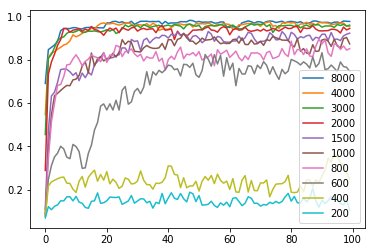

Average and std comp for the first 10 rounds
200 0.206328125
400 0.365390625
600 0.83234375
800 0.8950390625
1000 0.922140625
1500 0.9301822916666667
2000 0.9581015625
3000 0.9666666666666667
4000 0.97513671875
8000 0.982080078125


In [38]:
RWD_phB8000 = cmp_avg_std(np.load(path+Path_phB8000+RWD)/64)
RWD_phB4000 = cmp_avg_std(np.load(path+Path_phB4000+RWD)/64)
RWD_phB3000 = cmp_avg_std(np.load(path+Path_phB3000+RWD)/64)
RWD_phB2000 = cmp_avg_std(np.load(path+Path_phB2000+RWD)/64)
RWD_phB1500 = cmp_avg_std(np.load(path+Path_phB1500+RWD)/64)
RWD_phB1000 = cmp_avg_std(np.load(path+Path_phB1000+RWD)/64)
RWD_phB800  = cmp_avg_std(np.load(path+Path_phB800+RWD)/64)
RWD_phB600  = cmp_avg_std(np.load(path+Path_phB600+RWD)/64)
RWD_phB400  = cmp_avg_std(np.load(path+Path_phB400+RWD)/64)
RWD_phB200  = cmp_avg_std(np.load(path+Path_phB200+RWD)/64)

plt.plot(RWD_phB8000[0],label='8000')
plt.plot(RWD_phB4000[0],label='4000')
plt.plot(RWD_phB3000[0],label='3000')
plt.plot(RWD_phB2000[0],label='2000')
plt.plot(RWD_phB1500[0],label='1500')
plt.plot(RWD_phB1000[0],label='1000')
plt.plot(RWD_phB800[0],label='800')
plt.plot(RWD_phB600[0],label='600')
plt.plot(RWD_phB400[0],label='400')
plt.plot(RWD_phB200[0],label='200')
plt.legend()
plt.show()

y_plt_avg = np.asarray([RWD_phB200, RWD_phB400, RWD_phB600, RWD_phB800, RWD_phB1000, RWD_phB1500, RWD_phB2000,RWD_phB3000,RWD_phB4000,RWD_phB8000])

print('Average and std comp for the first 10 rounds')

for i in range(len(NS_LIST_B)):
    print(NS_LIST_B[i], y_plt_avg[i].max())


In [153]:
RWD_phB400[0].shape

(100,)